<a href="https://colab.research.google.com/github/santhosh-narapareddy/SnP500-EconomicIndicators-DescriptiveStudy/blob/main/S%26P_500_and_Economic_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A PEEK AT ECONOMIC INDICATORS AND PERFORMANCE OF S&P 500 COMPANIES



# ***Exploratory data analysis | Data Transformation | Visualization***

## **Importing necessary modules and mounting google drive**






In [ ]:
!pip install mplfinance
import yfinance as yf
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

from google.colab import drive
drive.mount('/content/drive')

ProjectDirectory = '/content/drive/MyDrive/ProjectDirectory'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 6.2 MB/s eta 0:00:00
Mounted at /content/drive


## **Downloading the stock list into google drive**

In [ ]:
# Get the list of tickers for the S&P 500 stocks
sp500_tickers_table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500_tickers = sp500_tickers_table["Symbol"].tolist()


# Save the tickers in a JSON file
with open(ProjectDirectory + '/sp500_tickers.json', 'w') as f:
    json.dump(sp500_tickers, f)

# Read the tickers from the JSON file
with open(ProjectDirectory + '/sp500_tickers.json', 'r') as f:
    sp500_tickers = json.load(f)
    sp500_tickers.sort()
    tickerData = sp500_tickers
    
# Read the tickers along with other details like company name and sector from the JSON file downloaded from financialmodelingprep.com API
with open(ProjectDirectory + '/sp500_tickers_detailed.json', 'r') as f:
    sp500_tickers_detailed = json.load(f)

#Creating detailed ticker variable
ticker_detail = {d['symbol']: d for d in sp500_tickers_detailed}

print(f"The stock ticker count is {len(tickerData)}")
print(f"The stock tickers list is {tickerData}")


The stock ticker count is 503
The stock tickers list is ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 

## **Downloading individual stock data for the years 2012 to 2022 and saving in ProjectDirectory**

In [ ]:
def download_stocks_data(tickers):
    # Define the start and end dates for the data
    start_date = "2012-01-01"
    end_date = "2022-12-31"

    # Download data for each ticker
    for ticker in tickerData:
      try:
        # Check if file exists
        filepath = f'/content/drive/MyDrive/ProjectDirectory/MonthlyStockData/{ticker}.csv'
        if os.path.isfile(filepath):
            print(f"Data already exists for ticker: {ticker}")
            continue
        
        # Download data and save to file
        stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
        stock_data["ticker"] = ticker
        stock_data.to_csv(filepath)
        print(f"Successfully downloaded data for ticker: {ticker}")
      except:
        print("--------------------------***--------------------------")
        print(f"Failed to download data for ticker: {ticker}")
        print("--------------------------***--------------------------")

    
#Download and save the csv files to google drive
download_stocks_data(tickerData)

Data already exists for ticker: A
Data already exists for ticker: AAL
Data already exists for ticker: AAP
Data already exists for ticker: AAPL
Data already exists for ticker: ABBV
Data already exists for ticker: ABC
Data already exists for ticker: ABT
Data already exists for ticker: ACGL
Data already exists for ticker: ACN
Data already exists for ticker: ADBE
Data already exists for ticker: ADI
Data already exists for ticker: ADM
Data already exists for ticker: ADP
Data already exists for ticker: ADSK
Data already exists for ticker: AEE
Data already exists for ticker: AEP
Data already exists for ticker: AES
Data already exists for ticker: AFL
Data already exists for ticker: AIG
Data already exists for ticker: AIZ
Data already exists for ticker: AJG
Data already exists for ticker: AKAM
Data already exists for ticker: ALB
Data already exists for ticker: ALGN
Data already exists for ticker: ALK
Data already exists for ticker: ALL
Data already exists for ticker: ALLE
Data already exists fo

## **Calculating monthly returns and overall return of stock data for the years 2012 to 2022**

In [ ]:
#Function to calculate monthly return for the stock dataframe
def calculate_return(df):
  #calculate percent change on df close column
  monthly_returns = df['Close'].pct_change()
  #calculate cumulative product for monthly return column
  cumulative_returns = (1 + monthly_returns).cumprod()
  #calculate overall return by taking last row value and deduct 1
  overall_return = cumulative_returns[-1] - 1
  #multiply with 100 to get the return in percentage format
  overall_return_pct = overall_return *100
  return overall_return_pct

#iterating through
for k,v in ticker_detail.items():
  try:
    df = pd.read_csv(f"/content/drive/MyDrive/ProjectDirectory/MonthlyStockData/{k}.csv")
    df["ticker"] = k   # Add a column with the stock ticker
    #convert to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    #set index to Date column
    df = df.set_index('Date')
    df['returnMonthly'] = df['Close'].pct_change()
    v.update({'data': df})
    v.update({'return_overall':calculate_return(v['data'])})
    print(f"Monthly and overall return calculation successful for for {k}.")
  except Exception as e:
    print("------------------------------*****------------------------------")
    print(f"Processing failed for {k}.\n Reason: {e}")
    print("------------------------------*****------------------------------")



Monthly and overall return calculation successful for for MMM.
Monthly and overall return calculation successful for for AOS.
Monthly and overall return calculation successful for for ABT.
Monthly and overall return calculation successful for for ABBV.
Monthly and overall return calculation successful for for ACN.
Monthly and overall return calculation successful for for ATVI.
Monthly and overall return calculation successful for for ADM.
Monthly and overall return calculation successful for for ADBE.
Monthly and overall return calculation successful for for ADP.
Monthly and overall return calculation successful for for AAP.
Monthly and overall return calculation successful for for AES.
Monthly and overall return calculation successful for for AFL.
Monthly and overall return calculation successful for for A.
Monthly and overall return calculation successful for for APD.
Monthly and overall return calculation successful for for AKAM.
Monthly and overall return calculation successful for

## **Creating a DataFrame for further analysis**

In [ ]:
# Create a DataFrame with all the columns except 'data'
df = pd.DataFrame.from_dict(ticker_detail, orient='index')[['symbol', 'name', 'sector','dateFirstAdded','founded','return_overall']]

#Changing the value of SRE stock to 2001 as data has only year value
ticker_detail['SRE']['dateFirstAdded'] = "2001-01-01"

#converting date added to datetime format
df['dateFirstAdded'] = pd.to_datetime(df['dateFirstAdded'],format='%Y-%m-%d')


# display the DataFrame
df = df.sort_values(by='symbol')

print("------------------------------*****------------------------------")
#check for df info
print(df.info())

print("------------------------------*****------------------------------")
#check for NAs
print(df.isna().sum())

#Replace the blank date values with date from founded year and add 10 years to the listing date
df['dateFirstAdded'] = df.apply(lambda row: pd.to_datetime(row['founded']) + pd.DateOffset(years=10) if pd.isna(row['dateFirstAdded']) else row['dateFirstAdded'],axis=1)

#remove rows with NAs as they are delisted from the market Tickers are [GEHC,BRK-B,BF-B]
df = df.dropna(axis=0)

print("------------------------------*****------------------------------")
#check for df info
print(df.info())

# sort based on column 'return_overall' in descending order
df = df.sort_values(by='return_overall', ascending=False)

print("------------------------------*****------------------------------")
#check df head values
print(df.head(10).to_string())

print("------------------------------*****------------------------------")
#check for NA rows if any after data cleaning and transforming
na_rows = df[df.isna().any(axis=1)]
print(na_rows)


print("------------------------------*****------------------------------")
#filter df with stocks listing date (dateFirstAdded <2012)
df_top = df[df['dateFirstAdded'] < '2012-01-01']

#Top 10 stocks sorted with return %
print(df_top.head(10).to_string())

#Bottom 10 stocks sorted with return %
print("------------------------------*****------------------------------")
df_bottom = df.sort_values(by='return_overall', ascending=True)
print(df_bottom.head(10).to_string())

------------------------------*****------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, A to ZTS
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   symbol          503 non-null    object        
 1   name            503 non-null    object        
 2   sector          503 non-null    object        
 3   dateFirstAdded  493 non-null    datetime64[ns]
 4   founded         503 non-null    object        
 5   return_overall  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 27.5+ KB
None
------------------------------*****------------------------------
symbol             0
name               0
sector             0
dateFirstAdded    10
founded            0
return_overall     3
dtype: int64
------------------------------*****------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, A to ZTS
Data

## **Downloading S&P 500 index data for the years 2012 to 2022 and calculating monthly and overall return**

In [ ]:
# Define the ticker symbol
# ^GSPC is symbol for s&p 500 index
tickerSymbol = '^GSPC'

# Define the start and end dates
start_date = '2012-01-01'
end_date = '2022-12-31'

# Download the data
df_index = yf.download(tickerSymbol, start=start_date, end=end_date, interval='1mo')
df_index["ticker"] = tickerSymbol
df_index['returnMonthly'] = df_index['Close'].pct_change()
filepath = f'/content/drive/MyDrive/ProjectDirectory/index_data.csv'
df_index.to_csv(filepath)


#Function to calculate monthly return for the stock dataframe
def calculate_index_return(df):
  #calculate percent change on df close column
  monthly_returns = df['Close'].pct_change()
  #calculate cumulative product for monthly return column
  cumulative_returns = (1 + monthly_returns).cumprod()
  #calculate overall return by taking last row value and deduct 1
  overall_return = cumulative_returns[-1] - 1
  #multiply with 100 to get the return in percentage format
  global overall_index_return_pct 
  overall_index_return_pct = overall_return *100
  return overall_index_return_pct


calculate_index_return(df_index)
print("------------------------------*****------------------------------")
print(df_index.head(10).to_string())

print("------------------------------*****------------------------------")
print(df_index.info())

print("------------------------------*****------------------------------")
print(overall_index_return_pct)



[*********************100%***********************]  1 of 1 completed
------------------------------*****------------------------------
                   Open         High          Low        Close    Adj Close       Volume ticker  returnMonthly
Date                                                                                                          
2012-01-01  1258.859985  1333.469971  1258.859985  1312.410034  1312.410034  79567560000  ^GSPC            NaN
2012-02-01  1312.449951  1378.040039  1312.449951  1365.680054  1365.680054  78385710000  ^GSPC       0.040589
2012-03-01  1365.900024  1419.150024  1340.030029  1408.469971  1408.469971  83899660000  ^GSPC       0.031332
2012-04-01  1408.469971  1422.380005  1357.380005  1397.910034  1397.910034  74761710000  ^GSPC      -0.007497
2012-05-01  1397.859985  1415.319946  1291.979980  1310.329956  1310.329956  86920490000  ^GSPC      -0.062651
2012-06-01  1309.869995  1363.459961  1266.739990  1362.160034  1362.160034  81582440000

# **Q1. Stock returns over the past 10 years | Stocks with highest and lowest return over the past 10 years.**

In [ ]:
import plotly.express as px
pd.options.plotting.backend = "matplotlib"

# Set custom color scheme
colors = px.colors.qualitative.Pastel

# Create the plot
fig = px.bar(df_top[:10], x='name', y='return_overall', 
             title='Overall Return % for the years 2012 to 2022 (Gainers)', 
             labels={'name': 'Best performers of stocks listed before 2012 for the years 2012 to 2022', 'return_overall': 'Return Overall (%)'})

# Set custom color scheme
fig.update_traces(marker_color=colors)

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45,template='plotly_dark')

# Increase font size of title and axis labels
fig.update_layout(title_font=dict(size=24), 
                  xaxis=dict(title_font=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18)))

fig.show()


In [ ]:
# Set custom color scheme
colors = px.colors.qualitative.Pastel

# Create the plot
fig = px.bar(df_bottom[:10], x='name', y='return_overall', 
             title='Overall Return % for the years 2012 to 2022 (Losers)', 
             labels={'name': 'Least Performers of stocks listed before 2012 for the years 2012 to 2022', 'return_overall': 'Return Overall (%)'})

# Set custom color scheme
fig.update_traces(marker_color=colors)

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45,template='plotly_dark')

# Increase font size of title and axis labels
fig.update_layout(title_font=dict(size=24), 
                  xaxis=dict(title_font=dict(size=18)),
                  yaxis=dict(title_font=dict(size=18)))

fig.show()


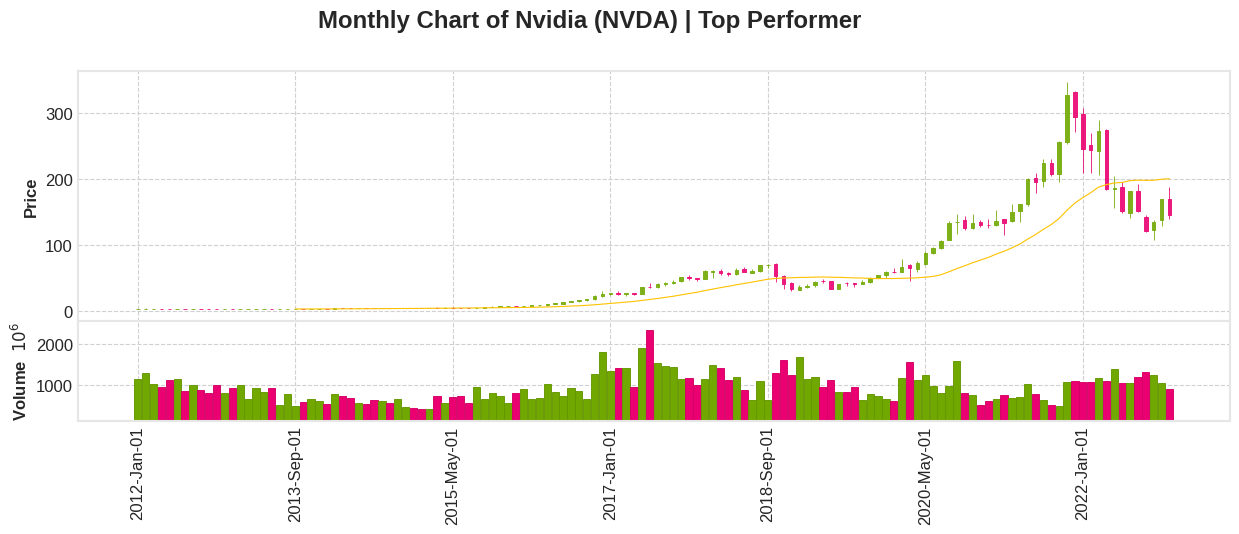

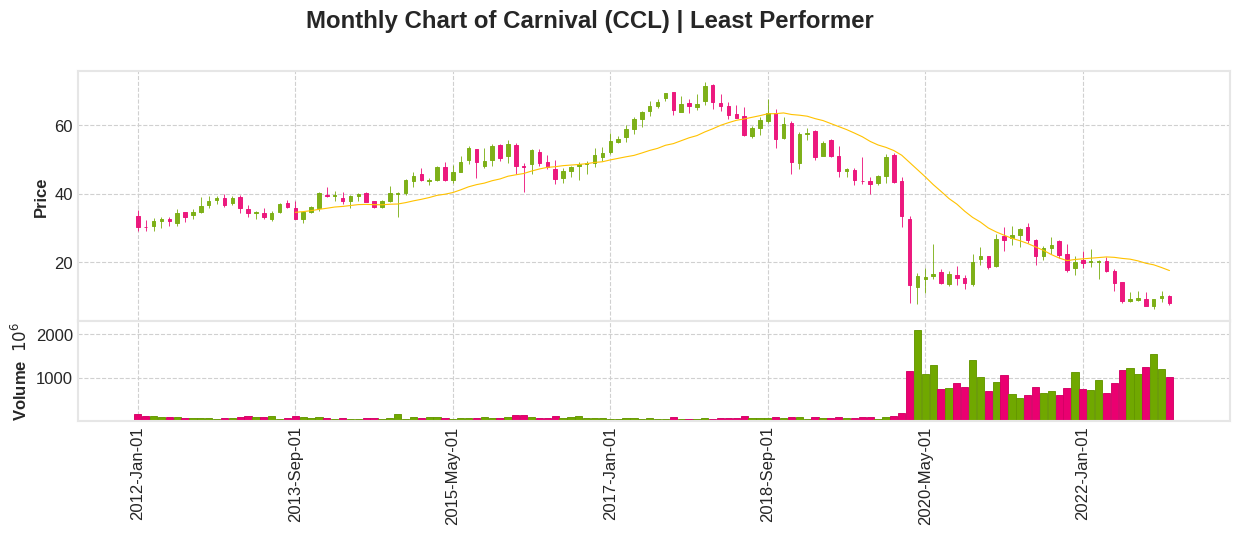

In [ ]:
#Highest return - Nvidia
nvda = ticker_detail['NVDA']['data']
mpf.plot(nvda, mav = (21), type = 'candle', volume = True,title='Monthly Chart of Nvidia (NVDA) | Top Gainer',style='binance',xrotation=90,figsize=(16, 5))

print('\n')
#Lowest return - Carnival
ccl = ticker_detail['CCL']['data']
mpf.plot(ccl, mav = (21), type = 'candle', volume = True,title='Monthly Chart of Carnival (CCL) | Top Loser',style='binance',xrotation=90,figsize=(16, 5))

# **Q2. Is there some kind of relation between economic indicators (GDP growthrate, unemployment rate) and stock returns?**

In [ ]:
#loading the indicators data from google drive

#GDP data load and some data cleaning (dropping NAs and standard date format)
gdp = pd.read_csv('/content/drive/MyDrive/ProjectDirectory/gdp_actual.csv')
gdp = gdp.dropna(axis=0)
gdp['Month'] = gdp['Quarter'].map({'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'})

#Inflation data load and some data cleaning (dropping NAs and changing year type to integer)
inflation = pd.read_csv('/content/drive/MyDrive/ProjectDirectory/Inflation_data_final.csv')
inflation = inflation.dropna(axis=0)
inflation['Year'] = inflation['Year'].astype(int)

#Unemployment data load and some data cleaning (dropping NAs and changing year type to integer)
unemployment = pd.read_csv('/content/drive/MyDrive/ProjectDirectory/Unemployment_data_final.csv')
unemployment = unemployment.dropna(axis=0)
unemployment['Year'] = unemployment['Year'].astype(int)


In [ ]:
#changing the date columns in each of the indicators to DateTime format
gdp['Date'] = pd.to_datetime(gdp['Year'].astype(str) + '-' + gdp['Month'].astype(str), format='%Y-%m')
inflation['Date'] = pd.to_datetime((inflation['Year']).astype(int).astype(str) + '-' + inflation['Month'].astype(str), format='%Y-%b')
unemployment['Date'] = pd.to_datetime(unemployment['Year'].astype(int).astype(str) + '-' + unemployment['Month'].astype(str), format='%Y-%b')

#merging dataframes on date column 
df_all = gdp.merge(inflation,on='Date',how='outer').merge(unemployment, on = 'Date').merge(df_index,on ='Date')

#sorting based on date
df_all = df_all.sort_values(by='Date')

#filling month values for quarterly GDP to using fillna
df_all['GDP'] = df_all['GDP'].fillna(method='ffill')

#renaming column
df_all = df_all.rename(columns = {"returnMonthly":"Monthly Stock Return %"})

#calculating GDP percent change and unemployment percent change
df_all['GDP Rate %'] = df_all['GDP'].pct_change()
df_all['Unemployment Change %'] = df_all['Unemployment Rate'].pct_change()

#creating a clean df with selected columns for statistical analysis
df_all_clean = df_all.set_index('Date')[['GDP','GDP Rate %','Inflation Rate','Unemployment Rate','Unemployment Change %','Monthly Stock Return %','Close']]


In [ ]:
#checking the information about the clean df
df_all_clean.info()
#GDP rate and unemployment rate columns have first row as NaN/Null as first row cannot have any previous value for percent computation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2012-01-01 to 2022-12-01
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GDP                     132 non-null    float64
 1   GDP Rate %              131 non-null    float64
 2   Inflation Rate          132 non-null    float64
 3   Unemployment Rate       132 non-null    float64
 4   Unemployment Change %   131 non-null    float64
 5   Monthly Stock Return %  131 non-null    float64
 6   Close                   132 non-null    float64
dtypes: float64(7)
memory usage: 8.2 KB


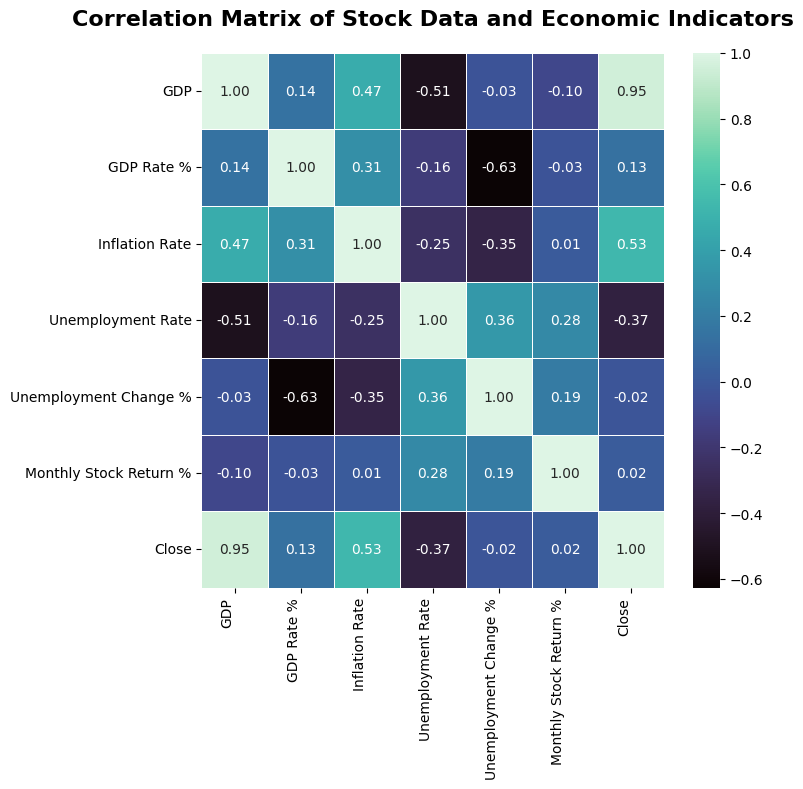

In [ ]:
# create the heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_all_clean.corr(), cmap='mako', annot=True, linewidths=.5, ax=ax, fmt='.2f', annot_kws={'size': 10})

# set the chart title and adjust the position
ax.set_title('Correlation Matrix of Stock Data and Economic Indicators', fontsize=16, fontweight='bold', pad=20)

# adjust the tick label font size
ax.tick_params(axis='both', which='major', labelsize=10)

# rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)

# adjust the layout and display the plot
fig.tight_layout()
plt.show()

# **Q3. Can specific economic events, such as a sudden increase in inflation, etc.,have a notable impact on the performance of the stock market?**

In [ ]:
pd.options.plotting.backend = "plotly"

ax = df_all_clean[['GDP Rate %','Inflation Rate','Unemployment Change %','Monthly Stock Return %']].plot()
ax.update_layout(title_text='Monthly Stock Return vs Economic Indicators', title_x=0.5,template='plotly_dark')
ax

# **Q4. Are there any specific companies or sectors within the S&P 500 that consistently outperform or underperform the overall market?**

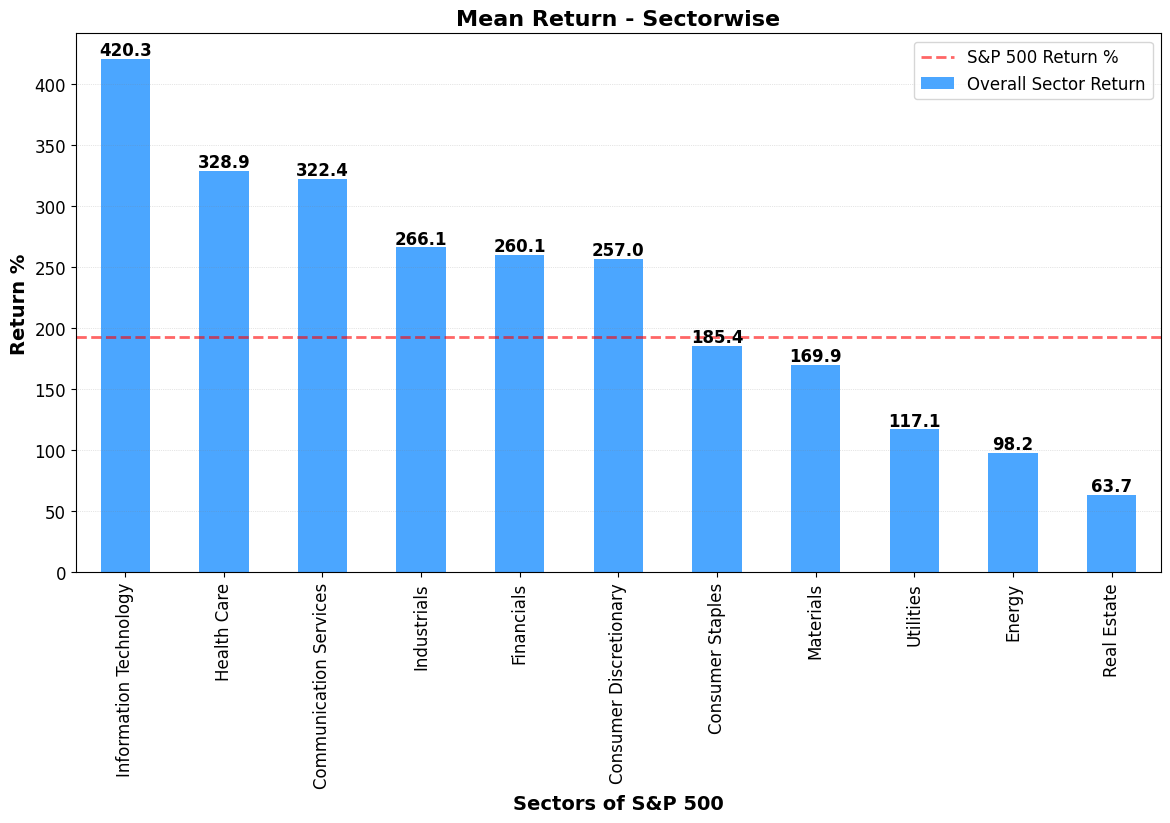

In [ ]:
pd.options.plotting.backend = "matplotlib"



#calculate sectorwise mean
df_2012 = df[df['dateFirstAdded'] < '2012-01-01']
df_sectors = df_2012.groupby('sector')[['return_overall']].mean()

#sort the df in descending order
df_sectors = df_sectors.sort_values('return_overall',ascending=False)

# Create a DataFrame for the plot
data = df_sectors

# Set the figure size
fig, ax =plt.subplots(1, 1, figsize=(14,7))

# Create the bar plot
df_sectors.plot(kind='bar', color='dodgerblue', alpha=0.8, ax=ax)

# Add labels to the bars with the value of the mean return
for i, v in enumerate(df_sectors['return_overall']):
    ax.text(i, v + 3, str(round(v, 1)), ha='center', fontweight='bold', fontsize=12)

# Add a horizontal line for the overall index return percentage
ax.axhline(y=overall_index_return_pct, color='r', linestyle='--', linewidth=2,alpha=0.6)

# Add a legend
ax.legend(['S&P 500 Return %', 'Overall Sector Return'], fontsize=12)

# Set the title and axis labels
ax.set_title('Mean Return - Sectorwise', fontsize=16, fontweight='bold')
ax.set_xlabel('Sectors of S&P 500', fontsize=14, fontweight='bold')
ax.set_ylabel('Return %', fontsize=14, fontweight='bold')

# Change the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a grid to the plot
ax.grid(True, axis='y', linestyle=':', linewidth=0.5, color='gray', alpha=0.4)

# plt.savefig(ProjectDirectory + 'mean_return_by_sector.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# **Q5. Which economic indicators have the strongest relation with the stock performance of the S&P 500, and to what extent do they impact the market?**

In [ ]:
df_all_clean.corr()

,GDP,GDP Rate %,Inflation Rate,Unemployment Rate,Unemployment Change %,Monthly Stock Return %,Close
GDP,1.000000,0.139147,0.471634,-0.514102,-0.028266,-0.096888,0.952059
GDP Rate %,0.139147,1.000000,0.306970,-0.164440,-0.626122,-0.025155,0.134283
Inflation Rate,0.471634,0.306970,1.000000,-0.245083,-0.347831,0.014031,0.532168
Unemployment Rate,-0.514102,-0.164440,-0.245083,1.000000,0.356554,0.275453,-0.374686
Unemployment Change %,-0.028266,-0.626122,-0.347831,0.356554,1.000000,0.190725,-0.020482
Monthly Stock Return %,-0.096888,-0.025155,0.014031,0.275453,0.190725,1.000000,0.018746
Close,0.952059,0.134283,0.532168,-0.374686,-0.020482,0.018746,1.000000


In [ ]:
#Create a df from correlation matrix
corr_df = df_all_clean.corr()

#Get max value for Monthly Stock Return %
MSR_type = corr_df.loc['Monthly Stock Return %', [col for col in corr_df.columns if col!='Monthly Stock Return %']].idxmax(axis=0)
MSR_value = corr_df.loc['Monthly Stock Return %', [col for col in corr_df.columns if col!='Monthly Stock Return %']].max(axis=0)
print(f"Highest correlation for Monthly Stock Return % is with {MSR_type} and value is {round(MSR_value,2)}")

#Get max value for Close Price
Close_type = corr_df.loc['Close', [col for col in corr_df.columns if col!='Close']].idxmax(axis=0)
Close_value = corr_df.loc['Close', [col for col in corr_df.columns if col!='Close']].max(axis=0)
print(f"Highest correlation for Close Price is with {(Close_type)} and value is {round(Close_value,2)}")



Highest correlation for Monthly Stock Return % is with Unemployment Rate and value is 0.28
Highest correlation for Close Price is with GDP and value is 0.95


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_all_clean.index, y=df_all_clean['GDP'],
                            mode='lines',
                            name='GDP',),
                            secondary_y=False)
fig.add_trace(go.Scatter(x=df_all_clean.index, y=df_all_clean['Close'],
                            mode='lines',
                            name='Close',), secondary_y=True)

fig.update_layout(
    height=800,
    title_text='GDP and Close Price of S&P 500',
    template='plotly'
)

fig.update_yaxes(title='GDP', secondary_y=False)
fig.update_yaxes(title='Close', secondary_y=True)

fig.update_xaxes(title='Year')

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_all_clean.index, y=df_all_clean['Monthly Stock Return %'],
                            mode='lines',
                            name='Monthly Stock Return',),
                            secondary_y=False)
fig.add_trace(go.Scatter(x=df_all_clean.index, y=df_all_clean['Unemployment Rate'],
                            mode='lines',
                            name='Unemployment Rate',), secondary_y=True)

fig.update_layout(
    height=800,
    title_text='Unemployment Rate and Monthly Stock Return of S&P 500',
    template='plotly'
)

fig.update_yaxes(title='Unemployment Rate', secondary_y=False)
fig.update_yaxes(title='Monthly Stock Return %', secondary_y=True)

fig.update_xaxes(title='Year')

# **Q6. Overall trends in the stock performance of the S&P 500 companies over the past 10 years?**

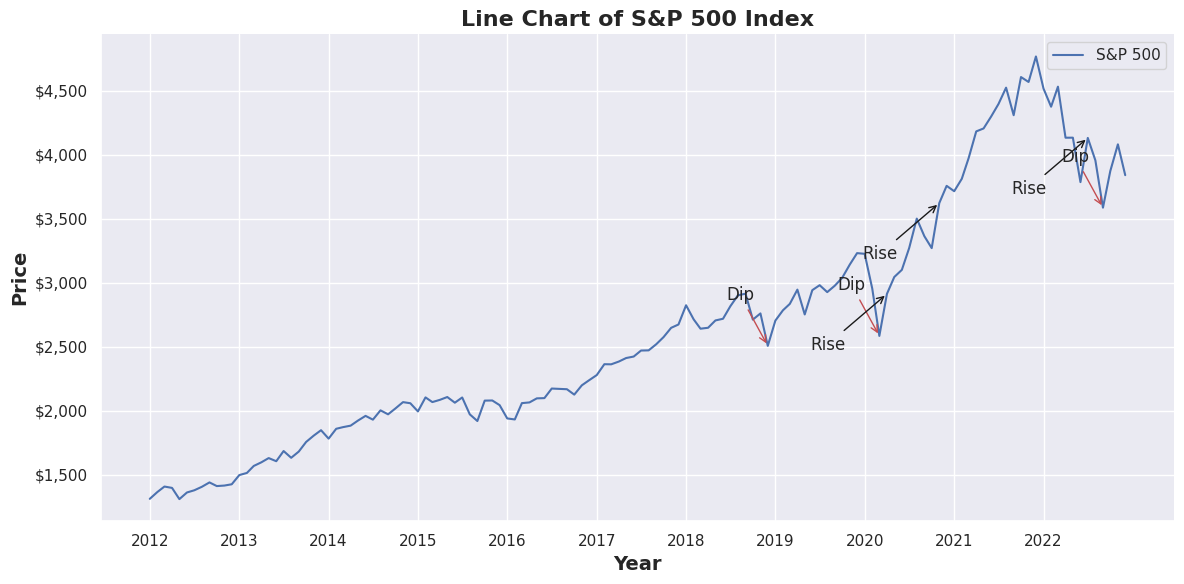

In [ ]:

# df_index = df_index.reset_index()
# create the plot
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_index, x='Date', y='Close', ax=ax)

# set the chart title and axis labels
ax.set_title('Line Chart of S&P 500 Index', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Price', fontsize=14, fontweight='bold')

# format the y-axis ticks with commas and add a dollar sign
ax.yaxis.set_major_formatter('${:,.0f}'.format)

# remove the top and right spines
sns.despine(top=True, right=True)

# add a legend
ax.legend(['S&P 500'])

# set x-axis ticks and labels to show each year
years = pd.date_range(start=df_index['Date'].min(), end=df_index['Date'].max(), freq='YS')
xticks = [year for year in years if year in df_index['Date'].values]
xlabels = [year.year for year in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)

# annotate dips and rises
threshold = 0.09  # 9% change
for i in range(1, len(df_index)):
    change = (df_index['Close'][i] - df_index['Close'][i-1]) / df_index['Close'][i-1]
    if change < -threshold:
        ax.annotate('Dip', xy=(df_index['Date'][i], df_index['Close'][i]), xytext=(-30, 30), 
                    textcoords='offset points', ha='left', va='bottom',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='r'))
    elif change > threshold:
        ax.annotate('Rise', xy=(df_index['Date'][i], df_index['Close'][i]), xytext=(-30, -30), 
                    textcoords='offset points', ha='right', va='top',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='k'))
        

# adjust the layout
fig.tight_layout()

# display the plot
plt.show()


In [ ]:
ticker_detail['AAPL']['data']

,Open,High,Low,Close,Adj Close,Volume,ticker,returnMonthly
Date,,,,,,,,
2012-01-01,14.621429,16.365713,14.607143,16.302856,13.875656,6859854400,AAPL,NaN
2012-02-01,16.371786,19.557501,16.213572,19.372856,16.488590,11368554400,AAPL,0.188311
2012-03-01,19.577499,22.194643,18.436428,21.412500,18.224577,15584338000,AAPL,0.105284
2012-04-01,21.493929,23.000000,19.821428,20.856428,17.751291,15598990400,AAPL,-0.025970
2012-05-01,20.889286,21.312857,18.649286,20.633215,17.561312,11106345600,AAPL,-0.010702
...,...,...,...,...,...,...,...,...
2022-08-01,161.009995,176.149994,157.139999,157.220001,156.502960,1510239600,AAPL,-0.032552
2022-09-01,156.639999,164.259995,138.000000,138.199997,137.760773,2084722800,AAPL,-0.120977
2022-10-01,138.210007,157.500000,134.369995,153.339996,152.852676,1868139700,AAPL,0.109551
